<a href="https://colab.research.google.com/github/jokend1ng/jokend1ng/blob/jokend1ng-ml_LEANING/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten, Reshape,Input

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train/255
x_test=x_test/255
x_train=np.reshape(x_train,(len(x_train),28,28,1))
x_test=np.reshape(x_test,(len(x_test),28,28,1))

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
input_img=Input((28,28,1))

x=Flatten()(input_img)
x=Dense(128,activation='relu')(x)
x=Dense(64,activation='relu')(x)
encoded=Dense(49,activation='relu')(x)

d=Dense(64,activation='relu')(encoded)
d=Dense(28*28,activation='sigmoid')(d)
decoded=Reshape((28,28,1))(d)

autoencoder=keras.Model(input_img,decoded,name='autoencoder')
autoencoder.compile(optimizer='adam',loss='mean_squared_error')

In [6]:
autoencoder.fit(x_train,x_train,epochs=20,batch_size=100,shuffle=True)

Epoch 1/20
600/600 [==============================] - 5s 7ms/step - loss: 0.0432
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0200
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0162
Epoch 4/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0143
Epoch 5/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0128
Epoch 6/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0117
Epoch 7/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0111
Epoch 8/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0105
Epoch 9/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0101
Epoch 10/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0097
Epoch 11/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0094
Epoch 12/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0091
Epoch 13/20
600/600 [====

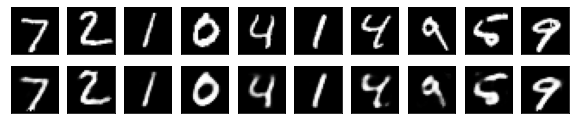

In [8]:
n=10
imgs=x_test[:n]
decoded_imgs=autoencoder.predict(x_test[:n],batch_size=n)
plt.figure(figsize=(n,2))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(imgs[i].squeeze(),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax2=plt.subplot(2,n,i+n+1)
    plt.imshow(decoded_imgs[i].squeeze(),cmap='gray')
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)

In [9]:
def plot_digits(*images):
    images=[x.squeeze() for x in images]
    n=images[0].shape[0]

    plt.figure(figsize=(n,1))
    for j in range(n):
        ax=plt.subplot(1,n,j+1)
        plt.imshow(images[0][j])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()    

In [10]:
from re import T
def plot_homotrope(frm,to,n=10,autoencoder=None):
    z=np.zeros(([n]+list(frm.shape)))
    for i,t in enumerate(np.linspace(0.,1.,n)):
        z[i]=frm*(1-t)+to *t
    if autoencoder:
        plot_digits(autoencoder.predict(z,batch_size=n))
    else:
        plot_digits(z)
               

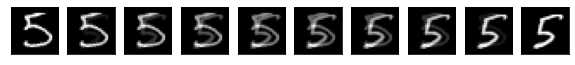

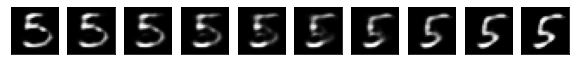

In [12]:
frm,to=x_test[y_test==5][1:3]
plot_homotrope(frm,to)
plot_homotrope(frm,to,autoencoder=autoencoder)